In [2]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True


## Lecture 8 ##

## Categorical Distribution ##

In [3]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [4]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [5]:
studio_distribution = studios.group('Studio')

In [6]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


## Bar Charts ##

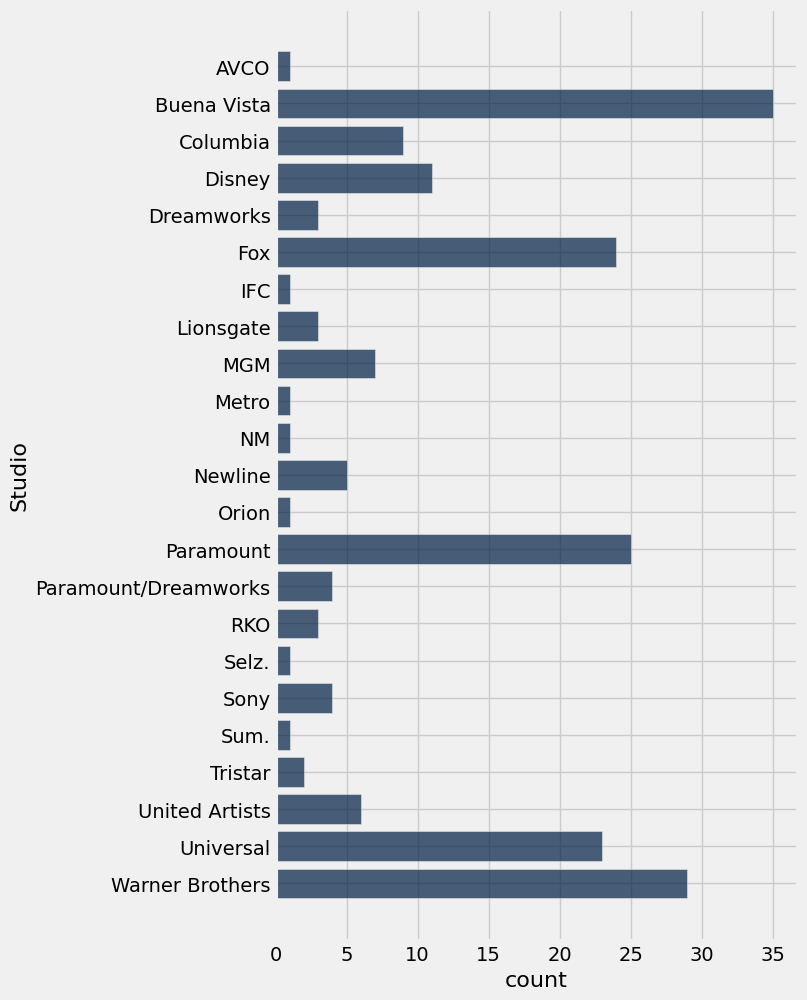

In [7]:
studio_distribution.barh('Studio')

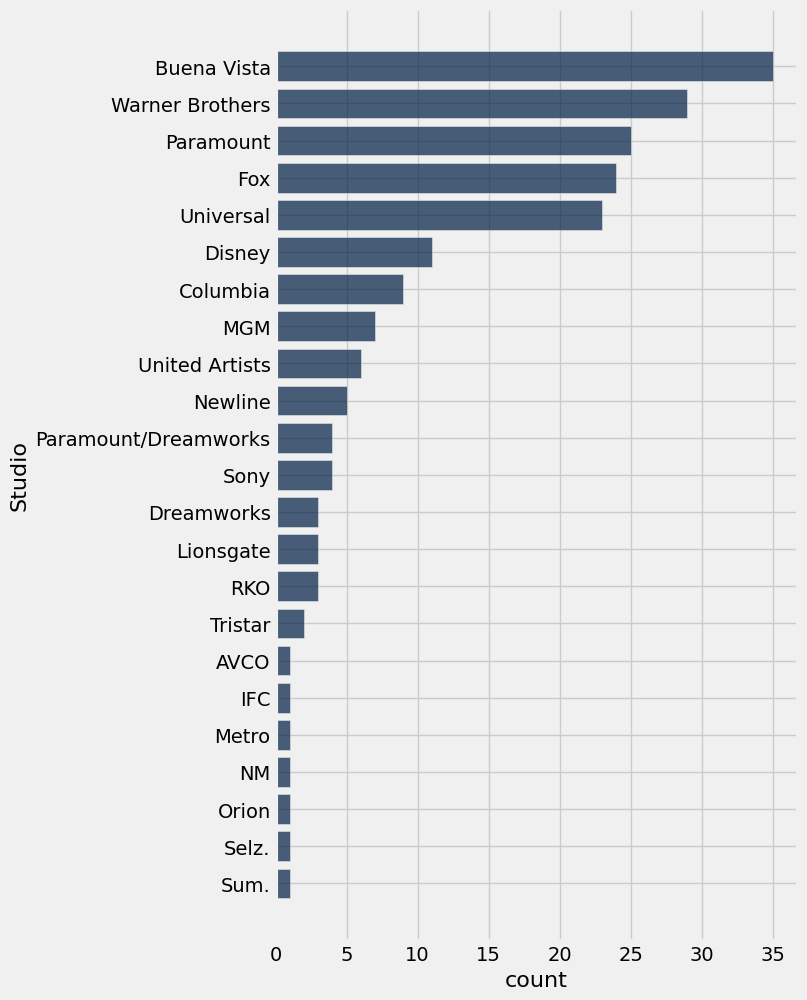

In [8]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [9]:
ages = 2023 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [10]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


In [11]:
min(ages), max(ages)

(6, 102)

In [12]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 102)

In [13]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
102,0


In [14]:
sum(binned_data.column('Age count'))

200

In [15]:
top_movies.bin('Age', bins = np.arange(0, 126, 25))

bin,Age count
0,79
25,69
50,42
75,9
100,1
125,0


## Histograms ##

In [16]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 102])

In [17]:
binned_data

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
102,0


In [18]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [19]:
binned_data

bin,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5
102,0,0


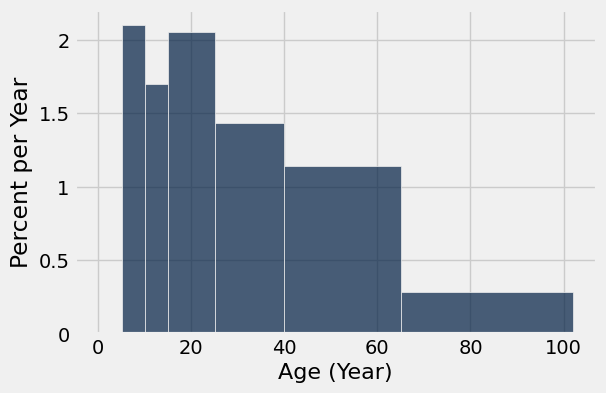

In [20]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

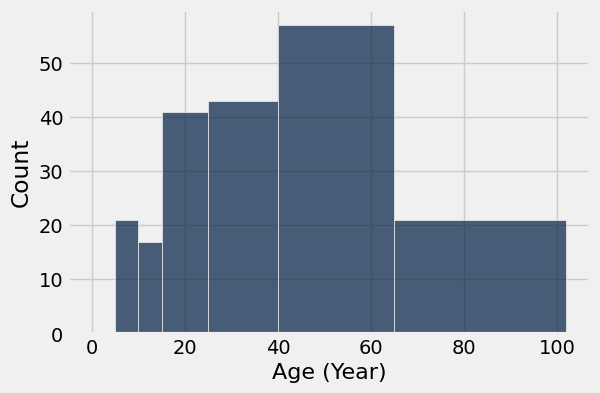

In [21]:
# With unequal bin sizes, plotting counts directly is misleading.
top_movies.hist('Age', bins = my_bins, unit = 'Year', normed = False)

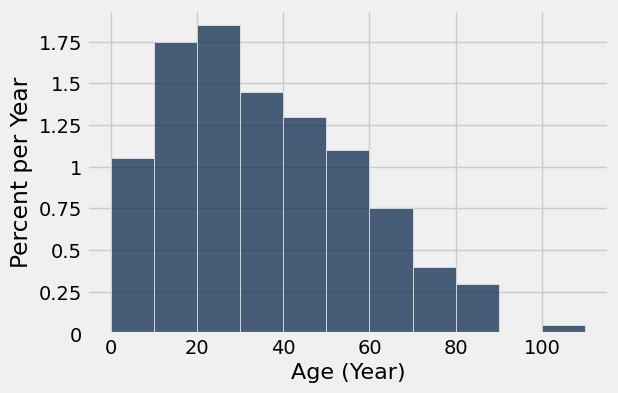

In [23]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 111, 10), unit = 'Year')

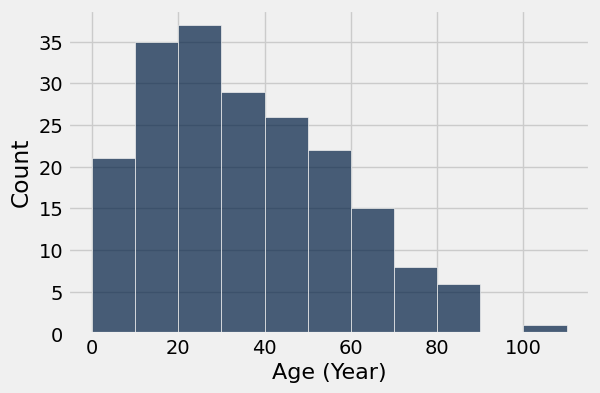

In [22]:
# For equal bin sizes, plotting counts directly is not so bad.
top_movies.hist('Age', bins = np.arange(0, 111, 10), unit = 'Year', normed = False)

In [23]:
top_movies.where('Age', are.between(90, 100))

Title,Studio,Gross,Gross (Adjusted),Year,Age


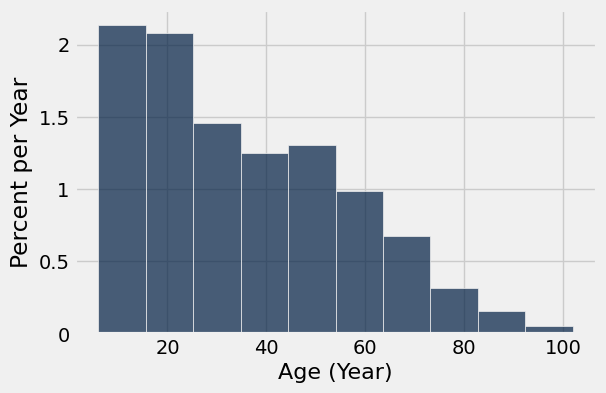

In [24]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

***Histogram for Gross Adjusted in Millions***

In [24]:
# Adding a column for Gross (Adjusted) in Millions
gross = top_movies.column('Gross (Adjusted)')
gross = gross / 1000000
gross


array([ 1796.1767  ,  1583.4832  ,  1266.0727  ,  1261.085   ,
        1204.368   ,  1164.59    ,  1138.6207  ,  1103.5642  ,
         983.2266  ,   969.01    ,   961.1432  ,   888.2644  ,
         872.8259  ,   871.22    ,   865.0821  ,   836.1882  ,
         817.1862  ,   802.8743  ,   792.5117  ,   792.48    ,
         787.0031  ,   760.778   ,   738.2565  ,   702.7474  ,
         701.6216  ,   698.8841  ,   695.0364  ,   684.2562  ,
         683.474   ,   664.972   ,   661.9805  ,   655.0144  ,
         646.0901  ,   632.7344  ,   631.6427  ,   627.2593  ,
         622.2835  ,   617.7194  ,   615.8003  ,   602.157   ,
         599.2156  ,   597.261   ,   596.9637  ,   589.407   ,
         587.7293  ,   584.2     ,   581.8909  ,   574.5462  ,
         574.4308  ,   566.4037  ,   562.2003  ,   559.6666  ,
         557.8039  ,   547.9769  ,   547.5041  ,   545.6296  ,
         537.326   ,   536.0797  ,   534.8113  ,   533.4     ,
         533.4     ,   532.4245  ,   530.776   ,   527.

In [26]:
top_movies = top_movies.with_column('Gross (Adjusted in Millions)', gross)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age,Gross (Adjusted in Millions)
Gone with the Wind,MGM,198676459,1796176700,1939,84,1796.18
Star Wars,Fox,460998007,1583483200,1977,46,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,58,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41,1261.09
Titanic,Paramount,658672302,1204368000,1997,26,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,67,1164.59
Jaws,Universal,260000000,1138620700,1975,48,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,58,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,50,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86,969.01


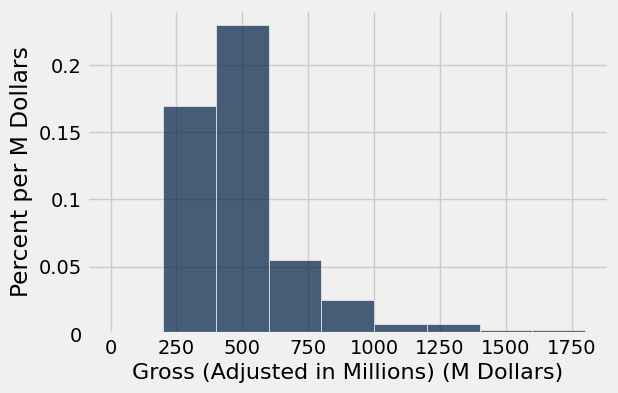

In [32]:
# Equal bin sizes
top_movies.hist('Gross (Adjusted in Millions)', bins = np.arange(0,2000,200), unit = 'M Dollars')

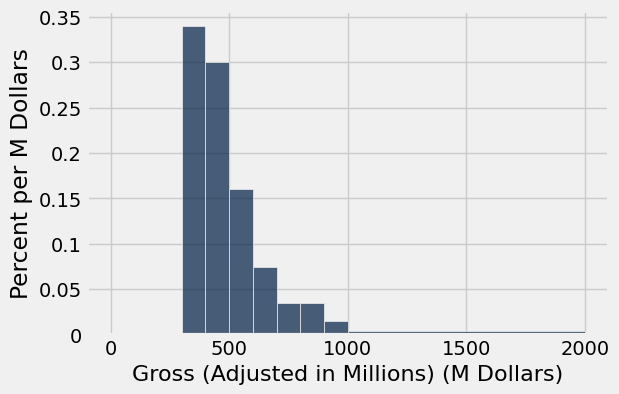

In [33]:
# Unequal bin sizes
new_bins = make_array(0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000)
top_movies.hist('Gross (Adjusted in Millions)', bins = new_bins, unit = 'M Dollars')

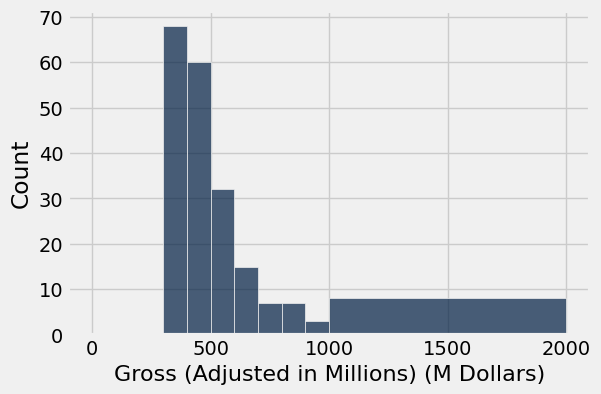

In [35]:
# Plotting counts inflates the importance of the last bin
top_movies.hist('Gross (Adjusted in Millions)', bins = new_bins, unit = 'M Dollars', normed = False)

In [34]:
# How many movies are in the first bar?
# bar width * density * size of data set
200 * 0.0017 * top_movies.num_rows

68.0

In [36]:
# Double check 68
movies_sample = top_movies.where('Gross (Adjusted in Millions)', are.below(400))
movies_sample = movies_sample.where('Gross (Adjusted in Millions)', are.above(200))
movies_sample.num_rows

68

In [38]:
# Asked another way, why does the bar have height 0.17?
movies_sample = top_movies.where('Gross (Adjusted in Millions)', are.below(400))
movies_sample = movies_sample.where('Gross (Adjusted in Millions)', are.above(200))

# density / size of data set * 100 (to convert to percent)
(movies_sample.num_rows / top_movies.num_rows) / 200 * 100

0.17

## Height ##

### Question: What is the height of the [40, 65) bin?

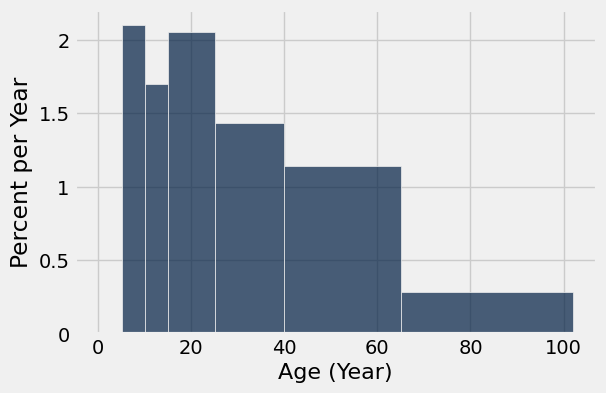

In [38]:
top_movies.hist('Age', bins=my_bins, unit='Year')

In [39]:
binned_data

bin,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5
102,0,0


In [40]:
# Step 1: Calculate % of movies in the [40, 65) bin

percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

28.5

In [41]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40
width

25

In [42]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.14

### What are the heights of the rest of the bins?

In [43]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [44]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [45]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [46]:
bin_lefts

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,21,10.5,5,2.1
10,17,8.5,5,1.7
15,41,20.5,10,2.05
25,43,21.5,15,1.43333
40,57,28.5,25,1.14
65,21,10.5,37,0.283784


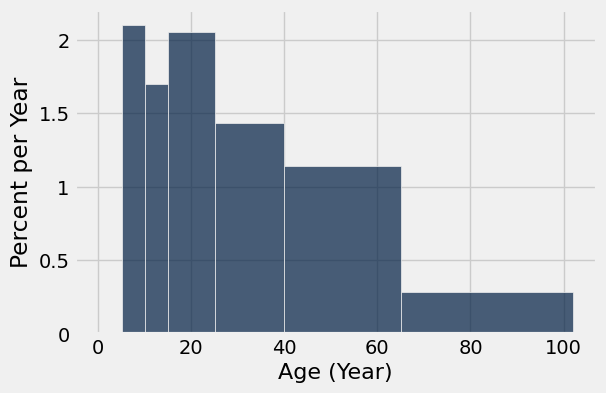

In [47]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')